In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyreadr
from sklearn.metrics import r2_score

In [4]:
result = pyreadr.read_r('./data/aoa_predictor_data_unify.rds') 
df = result[None]

In [5]:
df

,language,measure,uni_lemma,intercept,slope,aoa,lexical_class,category,definition,surprisal_2gm,...,surprisal_4gm,surprisal_5gm,surprisal_6gm,n_tokens,avg_perplexity,lstm_surprisal,all_frequency,concreteness,lexical_category,surprisal_1gm
0,French (Quebecois),produces,a,-7.642298,0.300078,25.467747,function_words,quantifiers,un/une,5.182213,...,3.311065,2.882234,2.753161,1.0,1.000801,0.000800,0.016638,1.46,function_words,4.718319
1,French (Quebecois),produces,a lot,-6.939060,0.300323,23.105338,function_words,quantifiers,beaucoup,7.253351,...,3.691350,2.844754,2.499866,1.0,1.013353,0.013258,0.000609,2.37,function_words,7.403989
2,French (Quebecois),produces,able,-7.072040,0.300250,23.553829,adjectives,descriptive_words,capable,9.566887,...,4.237535,3.032381,2.767762,1.0,2.205556,0.737962,0.000033,2.38,predicates,10.318314
3,French (Quebecois),produces,again,-5.213481,0.300077,17.373825,function_words,quantifiers,encore,7.440142,...,4.577443,4.032355,3.851144,1.0,1.002243,0.002240,0.001994,2.00,function_words,6.217626
4,French (Quebecois),produces,airplane,-6.052683,0.300306,20.155018,nouns,vehicles,avion,8.234762,...,3.739441,2.904038,2.637156,1.0,1.235269,0.198143,0.000078,4.96,nouns,9.458112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,Spanish (European),understands,window,-4.961325,0.300214,16.525946,nouns,household,ventana,6.729572,...,1.712079,1.250275,1.131855,1.0,1342.765169,7.183329,0.000304,4.86,nouns,8.097418
6030,Spanish (European),understands,wolf,-5.935164,0.300057,19.780151,nouns,animals,lobo,7.097523,...,2.489087,2.104468,2.018262,1.0,1299.735565,7.135401,0.000288,4.79,nouns,8.153771
6031,Spanish (European),understands,yogurt,-3.359205,0.300164,11.191244,nouns,food_drink,yogur,10.111230,...,6.411330,6.193807,5.956921,1.0,4269.787550,8.332960,0.000071,4.90,nouns,9.554664
6032,Spanish (European),understands,you,-4.976028,0.300145,16.578768,function_words,pronouns,tu/tuyo,7.467971,...,3.662504,3.329600,3.257565,1.0,567.219924,5.946147,0.001274,4.11,function_words,7.050974


In [6]:
df_eng = df[(
    df['language'] == 'English (American)')
    & (df['measure'] == 'produces')
    #& (df['lexical_category'] == 'predicates')
]

In [7]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 1156 to 1718
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   language          563 non-null    object  
 1   measure           563 non-null    object  
 2   uni_lemma         563 non-null    object  
 3   intercept         563 non-null    float64 
 4   slope             563 non-null    float64 
 5   aoa               563 non-null    float64 
 6   lexical_class     563 non-null    object  
 7   category          563 non-null    object  
 8   definition        563 non-null    object  
 9   surprisal_2gm     563 non-null    float64 
 10  surprisal_3gm     563 non-null    float64 
 11  surprisal_4gm     563 non-null    float64 
 12  surprisal_5gm     563 non-null    float64 
 13  surprisal_6gm     563 non-null    float64 
 14  n_tokens          563 non-null    float64 
 15  avg_perplexity    563 non-null    float64 
 16  lstm_surprisal    563 non-n

In [8]:
df_eng['lexical_category'].value_counts()

lexical_category
nouns             301
predicates        165
function_words     97
Name: count, dtype: int64

In [9]:
df_eng

,language,measure,uni_lemma,intercept,slope,aoa,lexical_class,category,definition,surprisal_2gm,...,surprisal_4gm,surprisal_5gm,surprisal_6gm,n_tokens,avg_perplexity,lstm_surprisal,all_frequency,concreteness,lexical_category,surprisal_1gm
1156,English (American),produces,a,-8.017985,0.299664,26.756573,function_words,quantifiers,a,4.086621,...,2.646706,2.314953,2.215155,1.0,1.001458,0.000020,0.018788,1.46,function_words,3.974560
1157,English (American),produces,a,-8.017985,0.299664,26.756573,function_words,quantifiers,an,8.309677,...,5.477966,4.854786,4.680649,1.0,1.000002,0.000002,0.000841,1.46,function_words,7.080953
1158,English (American),produces,about,-10.071986,0.300070,33.565418,function_words,locations,about,5.320386,...,3.006131,2.620802,2.496413,1.0,1.000002,0.000002,0.001711,1.77,function_words,6.370850
1159,English (American),produces,above,-9.883957,0.299979,32.948881,function_words,locations,above,11.284998,...,5.459383,4.726100,4.533245,1.0,1.000084,0.000084,0.000021,3.33,function_words,10.786856
1160,English (American),produces,airplane,-6.053720,0.300503,20.145297,nouns,vehicles,airplane,9.654694,...,5.945738,4.877159,4.474712,1.0,1.000023,0.000023,0.000074,4.96,nouns,9.508603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,English (American),produces,yourself,-10.290895,0.300153,34.285463,function_words,pronouns,yourself,6.843776,...,2.910740,2.108696,1.816710,1.0,1.000010,0.000010,0.000204,4.39,function_words,8.496697
1715,English (American),produces,yucky,-5.669777,0.257121,22.051018,adjectives,descriptive_words,yucky,12.191040,...,8.855253,8.384837,8.256498,1.0,1.000044,0.000044,0.000045,1.86,predicates,10.007199
1716,English (American),produces,zebra,-7.581749,0.299461,25.317959,nouns,animals,zebra,11.531981,...,8.269528,7.639753,7.429753,1.0,1.000024,0.000024,0.000056,4.86,nouns,9.787376
1717,English (American),produces,zipper,-7.456135,0.300096,24.845851,nouns,clothing,zipper,12.565283,...,8.465806,7.558821,7.246808,1.0,1.000081,0.000081,0.000026,4.83,nouns,10.549358


In [10]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def mean_absolute_deviation(y):
    return np.abs(y - y.mean()).mean()

def adj_r2_score(y, y_pred, n, p):
    r2 = r2_score(y, y_pred)
    return 1-((1-r2)*(n-1)/(n-p-1))

In [11]:
X_all_predictors = df_eng[['surprisal_1gm', 'concreteness', 'surprisal_2gm', 'surprisal_3gm', 'surprisal_4gm', 'lstm_surprisal']]

X_all_predictors = (X_all_predictors - X_all_predictors.mean()) / X_all_predictors.std()

In [12]:
## Adding lexical category as a feature
lexical_category = pd.get_dummies(df_eng['lexical_category'], prefix='lexcat').astype(int)
X_all_predictors = pd.concat([X_all_predictors, lexical_category], axis=1)

In [13]:
X_all_predictors


,surprisal_1gm,concreteness,surprisal_2gm,surprisal_3gm,surprisal_4gm,lstm_surprisal,lexcat_function_words,lexcat_nouns,lexcat_predicates
1156,-2.780743,-2.352318,-2.541516,-2.360181,-1.925950,-0.286133,1,0,0
1157,-0.993180,-2.352318,-0.578463,-0.349664,-0.002032,-0.527731,1,0,0
1158,-1.401807,-2.068206,-1.968011,-2.016145,-1.681711,-0.540944,1,0,0
1159,1.139367,-0.638482,0.804592,0.006759,-0.014659,0.590095,1,0,0
1160,0.403801,0.855396,0.046758,0.398874,0.315832,-0.250316,0,1,0
...,...,...,...,...,...,...,...,...,...
1714,-0.178496,0.332997,-1.259875,-1.649268,-1.746532,-0.429658,1,0,0
1715,0.690717,-1.985722,1.225758,1.560017,2.292927,0.044703,0,0,1
1716,0.564221,0.763747,0.919400,1.492697,1.894911,-0.233844,0,1,0
1717,1.002700,0.736252,1.399722,1.717793,2.028287,0.545661,0,1,0


In [14]:
## Adding residuals through residual LR models:

# The residual model input
unigram_surprisal = X_all_predictors['surprisal_1gm'].values.reshape(-1, 1)

residual_lr_models = {}
residual_surprisals = {}

for target in [
    'lstm_surprisal',
    'surprisal_2gm',
    'surprisal_3gm',
    'surprisal_4gm',
]:
    residual_lr_model = LinearRegression()
    target_surprisal = X_all_predictors[target].values
    residual_lr_model.fit(unigram_surprisal, target_surprisal)
    target_surprisal_resid = target_surprisal - residual_lr_model.predict(unigram_surprisal)

    residual_lr_models[target] = residual_lr_model
    residual_surprisals[target] = target_surprisal_resid

Concreteness (which was manually obtained) is a strong predictor of AoA.

In [15]:
n = df_eng['aoa'].shape[0]

# Predicting AoA as a function of each of these lists as input features.

for inp in [
    ['lstm_surprisal', 'surprisal_1gm'],
    ['concreteness', 'surprisal_1gm'],
    ['surprisal_1gm'],
    ['surprisal_2gm'],
    ['surprisal_3gm'],
    ['surprisal_4gm'],
]:
    p = len(inp)
    X = X_all_predictors[inp].values
    if p == 1:
        X = X.reshape(-1, 1)
    residual_lr_model = LinearRegression()
    residual_lr_model.fit(X, df_eng['aoa'].values.reshape(-1, 1))

    r2 = r2_score(
        df_eng['aoa'].values.reshape(-1, 1), 
        residual_lr_model.predict(X)
    )
    
    adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
    print(inp, adj_r2)

['lstm_surprisal', 'surprisal_1gm'] 0.04466188020985984
['concreteness', 'surprisal_1gm'] 0.4041152688790982
['surprisal_1gm'] -0.00175424817556169
['surprisal_2gm'] -0.0004309960598314344
['surprisal_3gm'] -0.0016404066926036798
['surprisal_4gm'] 0.0007003031245561564


In [16]:
residual_surprisals['lstm_surprisal'][:50]

array([ 1.51163966e+00,  1.14367967e-01,  3.65335384e-01, -1.46515466e-01,
       -5.11376799e-01,  5.77989331e-01, -1.33615732e-01, -2.67575619e-01,
        1.12049905e+00, -4.11868062e-01,  4.29990249e+00,  1.43178706e-01,
        9.07062417e-01,  8.03049258e-02, -2.86815487e-01,  1.59450569e+00,
        8.59041025e-01, -4.87188860e-01, -1.02223475e-01, -4.70831177e-01,
        6.04976157e-01, -1.51500248e-01,  4.51543974e-02,  3.49900055e-01,
       -3.59071810e-01, -3.80983883e-02, -4.36744903e-01, -4.23634734e-01,
        1.87939322e+00, -4.15874343e-01, -3.39947682e-01, -4.75068946e-01,
       -2.02793873e-01,  5.14472898e-01, -4.23833909e-01, -3.94129509e-01,
       -4.84312055e-01, -1.96725319e-01,  4.15944733e-01, -7.42368098e-02,
       -4.46924898e-01, -5.16114400e-01, -3.57172638e-01,  7.84474685e-02,
        4.34806864e-01,  1.60586837e-01, -2.97374582e-03, -4.67540671e-01,
       -2.98031506e-01,  3.43685034e-01])

#### Predicting AoA as a function of just LSTM surprisal

In [17]:
lexcat_feat_names = ['lexcat_function_words', 'lexcat_nouns', 'lexcat_predicates']

X = X_all_predictors[['lstm_surprisal']].values

## Add residual
#X = np.c_[X, residual_surprisals['lstm_surprisal']]

y = df_eng['aoa'].values

cv = LeaveOneOut()
y_true, y_pred = list(), list()
model_intercepts = []
model_coefs = []
for train_ix, test_ix in cv.split(X):
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	
	model = LinearRegression()
	model.fit(X_train, y_train)

	model_coefs.append(model.coef_)
	model_intercepts.append(model.intercept_)
	
	yhat = model.predict(X_test)

	y_true.append(y_test[0])
	y_pred.append(yhat[0])

model_coefs = np.array(model_coefs)
model_intercepts = np.array(model_intercepts)

r2 = adj_r2_score(y_true, np.array(y_pred), X.shape[0], X.shape[1])
mad = mean_absolute_deviation(np.array(y_pred))
print('MAD: %.3f' % mad)
print('R2: %.3f' % r2)

MAD: 0.345
R2: 0.018


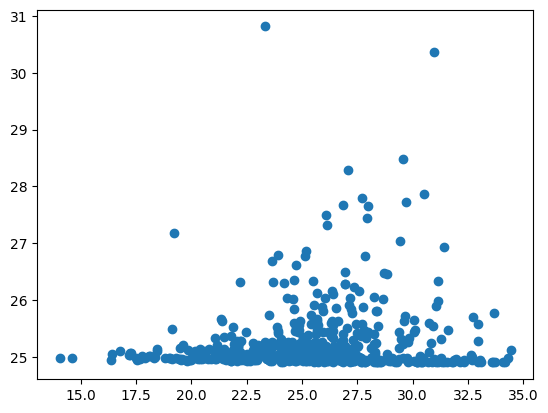

In [18]:
plt.scatter(y, y_pred)

In [19]:
df_eng['lexical_category'].value_counts()

lexical_category
nouns             301
predicates        165
function_words     97
Name: count, dtype: int64

When looking at correlation between LSTM surprisal and AoA, it is much higher when filtering by nouns or predicates, than when looking at all the words, but the p value is higher in the case of function words.

In [20]:
# Over all words
from scipy.stats import pearsonr
pearsonr(
    df_eng['aoa'],
    df_eng['lstm_surprisal']
)

PearsonRResult(statistic=0.16376758818182563, pvalue=9.478653302577328e-05)

In [21]:
# Over nouns
pearsonr(
    df_eng[df_eng['lexical_category'] == 'nouns']['aoa'],
    df_eng[df_eng['lexical_category'] == 'nouns']['lstm_surprisal']
)

PearsonRResult(statistic=0.4719525381092049, pvalue=4.213829104747086e-18)

In [22]:
# Over predicates
pearsonr(
    df_eng[df_eng['lexical_category'] == 'predicates']['aoa'],
    df_eng[df_eng['lexical_category'] == 'predicates']['lstm_surprisal']
)

PearsonRResult(statistic=0.26226921636370715, pvalue=0.0006663379790042927)

In [23]:
# Over function_words
pearsonr(
    df_eng[df_eng['lexical_category'] == 'function_words']['aoa'],
    df_eng[df_eng['lexical_category'] == 'function_words']['lstm_surprisal']
)

PearsonRResult(statistic=0.24353208444380314, pvalue=0.016228852405356105)

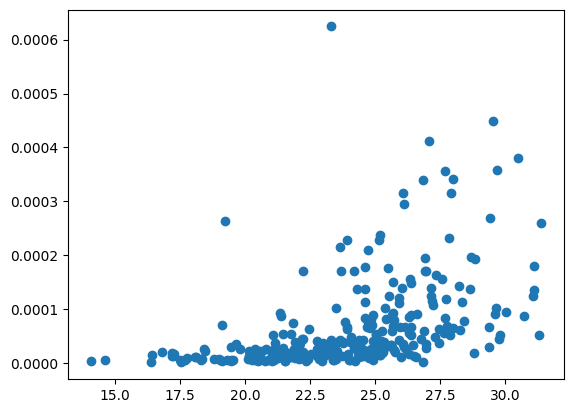

In [24]:
# Function
plt.scatter(
    df_eng[df_eng['lexical_category'] == 'nouns']['aoa'],
    df_eng[df_eng['lexical_category'] == 'nouns']['lstm_surprisal']
)